In [83]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from statistics import mean
from apyori import apriori

df = pd.read_csv("./Dataset/Train_HR_Employee_Attrition.csv")

In [84]:
#SETTING TRAINING SET (as executed in DataUnderstanding-attrition)


#MISSING VALUES

#infer Gender by Gender mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

#infer BusinessTravel by BusinessTravel mode
df['BusinessTravel']=df['BusinessTravel'].fillna(df['BusinessTravel'].mode()[0])

#infer PerformanceRating by PerformanceRating mode
df['PerformanceRating'] = df['PerformanceRating'].fillna(df['PerformanceRating'].mode()[0])

#infer YearsAtCompany by YearsAtCompany mean
df['YearsAtCompany'] = df['YearsAtCompany'].fillna(df['YearsAtCompany'].median())

#infer MonthlyIncome by mean grouped by YearsAtCompany-Quartiles
bins = pd.qcut(df['YearsAtCompany'],[0,0.25,0.50,0.75,1.0])
df['MonthlyIncome'] = df['MonthlyIncome'].groupby(bins).apply(
                      lambda x: x.fillna(x.mean()))

#infer Age by mean grouped by MonthlyIncome-quartiles
bins = pd.qcut(df['MonthlyIncome'],[0,0.25,0.50,0.75,1.0])
df['Age'] = df['Age'].groupby(bins).apply(lambda x: x.fillna(x.mean()))

#TrainingTimesLastYear by fillna with TrainingTimesLastYear values probability
df['TrainingTimesLastYear'] = df['TrainingTimesLastYear'].fillna(df['TrainingTimesLastYear'].mode()[0])


#OUTLIERS
df["MonthlyIncomeTrans"] = np.log(df['MonthlyIncome'])


#DIENSIONALITY REDUCTION
df['YearsMean'] = None
for index, row in df.iterrows(): 
    df.loc[index, 'YearsMean'] = mean((row['YearsInCurrentRole'], row['YearsSinceLastPromotion'], row['YearsWithCurrManager']))

df = df.drop(columns = ['YearsInCurrentRole', 'YearsInCurrentRole', 'YearsWithCurrManager', 'Over18','StandardHours'], axis = 'columns')

In [85]:
for row in df.columns: 
    print(row)

Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsSinceLastPromotion
MonthlyIncomeTrans
YearsMean


In [86]:
#attributi numerici
num_attr= ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncomeTrans','MonthlyRate','NumCompaniesWorked',
           'PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsMean',]

#attributi categorici
cat_attr = ['Attrition','BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction',
            'Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','OverTime',
            'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']

In [87]:
#Binning non-categorical attributes 
df['Age'] = pd.qcut(df['Age'], q=4)
df['DistanceFromHome'] = pd.qcut(df['DistanceFromHome'], q=4)
df['MonthlyIncomeTrans'] = pd.qcut(df['MonthlyIncomeTrans'], q=4)
df['NumCompaniesWorked'] = pd.qcut(df['NumCompaniesWorked'], q=4)
df['TotalWorkingYears'] = pd.qcut(df['TotalWorkingYears'], q=4, duplicates = 'drop')
df['TrainingTimesLastYear'] = pd.qcut(df['TrainingTimesLastYear'], q=4, duplicates='drop')
df['YearsAtCompany'] = pd.qcut(df['YearsAtCompany'], q=4)
df['YearsMean'] = pd.qcut(df['YearsMean'], q=4)
df['DailyRate'] = pd.qcut(df['DailyRate'], q=4)
df['HourlyRate'] = pd.qcut(df['HourlyRate'], q=4)
df['MonthlyIncome'] = pd.qcut(df['MonthlyIncome'], q=4)
df['MonthlyRate'] = pd.qcut(df['MonthlyRate'], q=4)
df['PercentSalaryHike'] = pd.qcut(df['PercentSalaryHike'], q=4)
df['YearsSinceLastPromotion'] = pd.qcut(df['YearsSinceLastPromotion'], q=4, duplicates='drop')

In [88]:
#Converting int values in string 
df['DistanceFromHome'] = 'DistanceFromHome:' + df['DistanceFromHome'].astype(str)
df['Education'] = 'Education:' + df['Education'].astype(str)
df['EnvironmentSatisfaction'] = 'EnvironmentSatisfaction:' + df['EnvironmentSatisfaction'].astype(str)
df['JobInvolvement'] = 'JobInvolvement:' + df['JobInvolvement'].astype(str)
df['JobLevel'] = 'JobLevel:' + df['JobLevel'].astype(str)
df['JobSatisfaction'] = 'JobSatisfaction:' + df['JobSatisfaction'].astype(str)
df['MonthlyIncomeTrans'] = 'MonthlyIncomeTrans:' + df['MonthlyIncomeTrans'].astype(str)
df['NumCompaniesWorked'] = 'NumCompaniesWorked:' + df['NumCompaniesWorked'].astype(str)
df['PerformanceRating'] = 'PerformanceRating:' + df['PerformanceRating'].astype(str)
df['RelationshipSatisfaction'] = 'RelationshipSatisfaction:' + df['RelationshipSatisfaction'].astype(str)
df['StockOptionLevel'] = 'StockOptionLevel:' + df['StockOptionLevel'].astype(str)
df['TotalWorkingYears'] = 'TotalWorkingYears:' + df['TotalWorkingYears'].astype(str)
df['TrainingTimesLastYear'] = 'TrainingTimesLastYear:' + df['TrainingTimesLastYear'].astype(str)
df['WorkLifeBalance'] = 'WorkLifeBalance:' + df['WorkLifeBalance'].astype(str)
df['YearsAtCompany'] = 'YearsAtCompany:' + df['YearsAtCompany'].astype(str)
df['YearsMean'] = 'YearsMean:' + df['YearsMean'].astype(str)
df['DailyRate'] = 'DailyRate:' + df['DailyRate'].astype(str)
df['HourlyRate'] = 'HourlyRate:' + df['HourlyRate'].astype(str)
df['MonthlyIncome'] = 'MonthlyIncome:' + df['MonthlyIncome'].astype(str)
df['MonthlyRate'] = 'MonthlyRate:' + df['MonthlyRate'].astype(str)
df['PercentSalaryHike'] = 'PercentSalaryHike:' + df['PercentSalaryHike'].astype(str)
df['YearsSinceLastPromotion'] = 'YearsSinceLastPromotion:' + df['YearsSinceLastPromotion'].astype(str)

df.to_csv("./Dataset/AR.csv", header=False, index=False)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,MonthlyIncomeTrans,YearsMean
0,"(43.0, 60.0]",No,Travel_Rarely,"DailyRate:(460.5, 804.0]",Research & Development,"DistanceFromHome:(7.0, 14.0]",Education:4,Medical,EnvironmentSatisfaction:2,Male,...,PerformanceRating:3.0,RelationshipSatisfaction:3,StockOptionLevel:0,"TotalWorkingYears:(15.0, 40.0]","TrainingTimesLastYear:(-0.001, 2.0]",WorkLifeBalance:2,"YearsAtCompany:(5.0, 9.0]","YearsSinceLastPromotion:(1.0, 3.0]","MonthlyIncomeTrans:(8.985, 9.903]","YearsMean:(5.333, 14.333]"
1,"(31.0, 36.0]",No,Travel_Rarely,"DailyRate:(1169.0, 1499.0]",Research & Development,"DistanceFromHome:(0.999, 2.0]",Education:1,Life Sciences,EnvironmentSatisfaction:2,Male,...,PerformanceRating:3.0,RelationshipSatisfaction:3,StockOptionLevel:1,"TotalWorkingYears:(15.0, 40.0]","TrainingTimesLastYear:(2.0, 3.0]",WorkLifeBalance:3,"YearsAtCompany:(-0.001, 3.0]","YearsSinceLastPromotion:(-0.001, 1.0]","MonthlyIncomeTrans:(8.146, 8.564]","YearsMean:(2.333, 5.333]"
2,"(31.0, 36.0]",No,Travel_Frequently,"DailyRate:(460.5, 804.0]",Sales,"DistanceFromHome:(14.0, 29.0]",Education:3,Life Sciences,EnvironmentSatisfaction:3,Male,...,PerformanceRating:3.0,RelationshipSatisfaction:3,StockOptionLevel:1,"TotalWorkingYears:(6.0, 10.0]","TrainingTimesLastYear:(3.0, 6.0]",WorkLifeBalance:3,"YearsAtCompany:(-0.001, 3.0]","YearsSinceLastPromotion:(-0.001, 1.0]","MonthlyIncomeTrans:(8.146, 8.564]","YearsMean:(2.333, 5.333]"
3,"(31.0, 36.0]",No,Travel_Rarely,"DailyRate:(804.0, 1169.0]",Research & Development,"DistanceFromHome:(2.0, 7.0]",Education:4,Technical Degree,EnvironmentSatisfaction:2,Male,...,PerformanceRating:3.0,RelationshipSatisfaction:2,StockOptionLevel:0,"TotalWorkingYears:(10.0, 15.0]","TrainingTimesLastYear:(-0.001, 2.0]",WorkLifeBalance:3,"YearsAtCompany:(-0.001, 3.0]","YearsSinceLastPromotion:(-0.001, 1.0]","MonthlyIncomeTrans:(6.9159999999999995, 8.146]","YearsMean:(2.333, 5.333]"
4,"(36.0, 43.0]",No,Travel_Rarely,"DailyRate:(1169.0, 1499.0]",Research & Development,"DistanceFromHome:(7.0, 14.0]",Education:2,Life Sciences,EnvironmentSatisfaction:3,Female,...,PerformanceRating:3.0,RelationshipSatisfaction:3,StockOptionLevel:0,"TotalWorkingYears:(-0.001, 6.0]","TrainingTimesLastYear:(-0.001, 2.0]",WorkLifeBalance:3,"YearsAtCompany:(9.0, 40.0]","YearsSinceLastPromotion:(1.0, 3.0]","MonthlyIncomeTrans:(8.564, 8.985]","YearsMean:(1.333, 2.333]"


In [94]:
#Association Rules 
ar = pd.read_csv("./Dataset/AR.csv", header=None)
itemsets = apriori(ar.values.tolist(), min_support=0.3, min_confidence=0.3, min_lift=1.5)

ar = list(itemsets)
len(ar)
ar

[RelationRecord(items=frozenset({'Single', 'StockOptionLevel:0'}), support=0.32568027210884354, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Single'}), items_add=frozenset({'StockOptionLevel:0'}), confidence=1.0, lift=2.2879377431906613), OrderedStatistic(items_base=frozenset({'StockOptionLevel:0'}), items_add=frozenset({'Single'}), confidence=0.745136186770428, lift=2.2879377431906613)])]

In [9]:
results = []
for item in ar: 
    pair =[]
    items = [x for x in pair]
    
    
    for i in item[0]: 
        pair.append(i)
    val2 = str(item[1])[:7]
    val3 = str(item[2][0][2])[:7]
    val4 = str(item[2][0][3])[:7]
    
    results.append((pair, val2, val3, val4))
    
    
label = ['title1', 'title2', 'title3', 'title4', 'title5', 'supp', 'conf', 'lift']
    
sugg = pd.DataFrame.from_records(results)
for i in results:
    print(i)

(['JobLevel:2', 'No'], '0.34948', '0.95804', '1.05000')
(['No', 'StockOptionLevel:1'], '0.37840', '0.94680', '1.03769')
(['Single', 'StockOptionLevel:0'], '0.32568', '1.0', '2.28793')
(['JobInvolvement:3', 'No', 'WorkLifeBalance:3'], '0.32738', '0.93446', '1.02416')
(['JobLevel:2', 'No', 'PerformanceRating:3.0'], '0.30102', '0.95934', '1.05144')
(['No', 'Male', 'Research & Development'], '0.36819', '0.93118', '1.02056')
(['Married', 'No', 'PerformanceRating:3.0'], '0.375', '0.94230', '1.03276')
(['No', 'StockOptionLevel:1', 'PerformanceRating:3.0'], '0.33248', '0.96068', '1.05290')
(['No', 'Research & Development', 'WorkLifeBalance:3'], '0.37329', '0.93404', '1.02370')
(['No', 'Male', 'Research & Development', 'PerformanceRating:3.0'], '0.32482', '0.93170', '1.02114')
(['WorkLifeBalance:3', 'No', 'Research & Development', 'PerformanceRating:3.0'], '0.33248', '0.94216', '1.03260')


In [96]:
length = list()
array = pd.read_csv("./Dataset/AR.csv", header=None)
    
for i in np.arange(0.1, , 0.1):
    itemsets = apriori(array.values.tolist(), min_support=i, min_length=2)
    ar = list(itemsets)
    length.append(len(ar))

length[0:5]

KeyboardInterrupt: 

In [61]:
itemsets = apriori(array.values.tolist(), min_support=0.3, min_confidence=0.9, min_lift=0, min_length=2)
ar = list(itemsets)
for i in ar: 
    print(i)

RelationRecord(items=frozenset({'No'}), support=0.9124149659863946, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'No'}), confidence=0.9124149659863946, lift=1.0)])
RelationRecord(items=frozenset({'No', 'Education:3'}), support=0.35459183673469385, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Education:3'}), items_add=frozenset({'No'}), confidence=0.9084967320261437, lift=0.9957056447928657)])
RelationRecord(items=frozenset({'No', 'Female'}), support=0.3494897959183674, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Female'}), items_add=frozenset({'No'}), confidence=0.9072847682119206, lift=0.9943773414885542)])
RelationRecord(items=frozenset({'JobInvolvement:3', 'No'}), support=0.5365646258503401, ordered_statistics=[OrderedStatistic(items_base=frozenset({'JobInvolvement:3'}), items_add=frozenset({'No'}), confidence=0.9198250728862973, lift=1.0081214219145254)])
RelationRecord(items=frozenset({'JobLevel:2', 'No'}), suppor

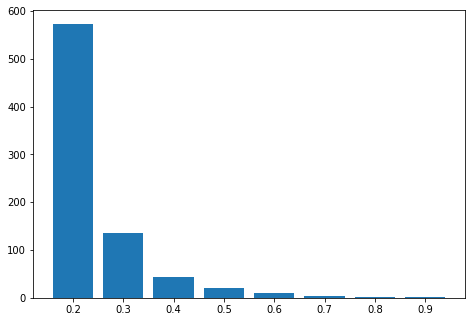

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
ax.bar(langs,length[1:9])
plt.show()

In [15]:
length = list()
array = pd.read_csv("./Dataset/AR.csv", header=None)
    
for i in np.arange(0.1, 1.2, 0.1):
    itemsets = apriori(array.values.tolist(), min_support=0.3, min_confidence=i, min_lift=1.03, min_length=2)
    ar = list(itemsets)
    length.append(len(ar))

length

[16, 16, 16, 16, 16, 16, 12, 9, 7, 1, 0]

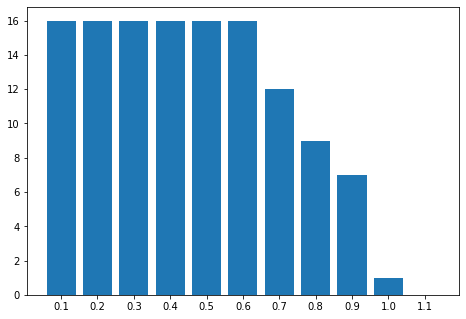

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0', '1.1']
ax.bar(langs,length)
plt.show()

In [17]:
length = list()
array = pd.read_csv("./Dataset/AR.csv", header=None)
    
for i in np.arange(1, 1.09, 0.01):
    itemsets = apriori(array.values.tolist(), min_support=0.3, min_confidence=0.9, min_lift=i, min_length=2)
    ar = list(itemsets)
    length.append(len(ar))

length

[40, 19, 11, 7, 4, 4, 1, 1, 1, 1]

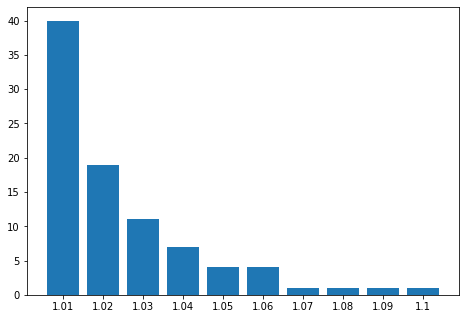

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['1.01', '1.02', '1.03', '1.04', '1.05', '1.06', '1.07', '1.08', '1.09', '1.1']
ax.bar(langs,length)
plt.show()

In [31]:
array

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,"(43.0, 60.0]",No,Travel_Rarely,Research & Development,"DistanceFromHome:(7.0, 14.0]",Education:4,Medical,EnvironmentSatisfaction:2,Male,JobInvolvement:3,...,No,PerformanceRating:3.0,RelationshipSatisfaction:3,StockOptionLevel:0,"TotalWorkingYears:(15.0, 40.0]","TrainingTimesLastYear:(-0.001, 2.0]",WorkLifeBalance:2,"YearsAtCompany:(5.0, 9.0]","MonthlyIncomeTrans:(8.985, 9.903]","YearsMean:(5.333, 14.333]"
1,"(31.0, 36.0]",No,Travel_Rarely,Research & Development,"DistanceFromHome:(0.999, 2.0]",Education:1,Life Sciences,EnvironmentSatisfaction:2,Male,JobInvolvement:3,...,Yes,PerformanceRating:3.0,RelationshipSatisfaction:3,StockOptionLevel:1,"TotalWorkingYears:(15.0, 40.0]","TrainingTimesLastYear:(2.0, 3.0]",WorkLifeBalance:3,"YearsAtCompany:(-0.001, 3.0]","MonthlyIncomeTrans:(8.146, 8.564]","YearsMean:(2.333, 5.333]"
2,"(31.0, 36.0]",No,Travel_Frequently,Sales,"DistanceFromHome:(14.0, 29.0]",Education:3,Life Sciences,EnvironmentSatisfaction:3,Male,JobInvolvement:3,...,Yes,PerformanceRating:3.0,RelationshipSatisfaction:3,StockOptionLevel:1,"TotalWorkingYears:(6.0, 10.0]","TrainingTimesLastYear:(3.0, 6.0]",WorkLifeBalance:3,"YearsAtCompany:(-0.001, 3.0]","MonthlyIncomeTrans:(8.146, 8.564]","YearsMean:(2.333, 5.333]"
3,"(31.0, 36.0]",No,Travel_Rarely,Research & Development,"DistanceFromHome:(2.0, 7.0]",Education:4,Technical Degree,EnvironmentSatisfaction:2,Male,JobInvolvement:3,...,No,PerformanceRating:3.0,RelationshipSatisfaction:2,StockOptionLevel:0,"TotalWorkingYears:(10.0, 15.0]","TrainingTimesLastYear:(-0.001, 2.0]",WorkLifeBalance:3,"YearsAtCompany:(-0.001, 3.0]","MonthlyIncomeTrans:(6.9159999999999995, 8.146]","YearsMean:(2.333, 5.333]"
4,"(36.0, 43.0]",No,Travel_Rarely,Research & Development,"DistanceFromHome:(7.0, 14.0]",Education:2,Life Sciences,EnvironmentSatisfaction:3,Female,JobInvolvement:3,...,No,PerformanceRating:3.0,RelationshipSatisfaction:3,StockOptionLevel:0,"TotalWorkingYears:(-0.001, 6.0]","TrainingTimesLastYear:(-0.001, 2.0]",WorkLifeBalance:3,"YearsAtCompany:(9.0, 40.0]","MonthlyIncomeTrans:(8.564, 8.985]","YearsMean:(1.333, 2.333]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,"(36.0, 43.0]",No,Travel_Rarely,Research & Development,"DistanceFromHome:(14.0, 29.0]",Education:2,Medical,EnvironmentSatisfaction:4,Female,JobInvolvement:4,...,Yes,PerformanceRating:3.0,RelationshipSatisfaction:2,StockOptionLevel:2,"TotalWorkingYears:(-0.001, 6.0]","TrainingTimesLastYear:(2.0, 3.0]",WorkLifeBalance:2,"YearsAtCompany:(9.0, 40.0]","MonthlyIncomeTrans:(6.9159999999999995, 8.146]","YearsMean:(-0.001, 1.333]"
1172,"(31.0, 36.0]",Yes,Non-Travel,Sales,"DistanceFromHome:(2.0, 7.0]",Education:4,Life Sciences,EnvironmentSatisfaction:2,Female,JobInvolvement:1,...,Yes,PerformanceRating:3.0,RelationshipSatisfaction:2,StockOptionLevel:0,"TotalWorkingYears:(10.0, 15.0]","TrainingTimesLastYear:(-0.001, 2.0]",WorkLifeBalance:2,"YearsAtCompany:(9.0, 40.0]","MonthlyIncomeTrans:(8.146, 8.564]","YearsMean:(5.333, 14.333]"
1173,"(31.0, 36.0]",No,Travel_Rarely,Sales,"DistanceFromHome:(2.0, 7.0]",Education:1,Marketing,EnvironmentSatisfaction:3,Male,JobInvolvement:2,...,No,PerformanceRating:3.0,RelationshipSatisfaction:1,StockOptionLevel:0,"TotalWorkingYears:(-0.001, 6.0]","TrainingTimesLastYear:(-0.001, 2.0]",WorkLifeBalance:4,"YearsAtCompany:(-0.001, 3.0]","MonthlyIncomeTrans:(6.9159999999999995, 8.146]","YearsMean:(1.333, 2.333]"
1174,"(43.0, 60.0]",No,Non-Travel,Sales,"DistanceFromHome:(2.0, 7.0]",Education:4,Marketing,EnvironmentSatisfaction:1,Male,JobInvolvement:3,...,Yes,PerformanceRating:3.0,RelationshipSatisfaction:4,StockOptionLevel:0,"TotalWorkingYears:(10.0, 15.0]","TrainingTimesLastYear:(-0.001, 2.0]",WorkLifeBalance:3,"YearsAtCompany:(9.0, 40.0]","MonthlyIncomeTrans:(8.146, 8.564]","YearsMean:(1.333, 2.333]"


In [98]:
results = []
for support in np.arange(0.1, 1, 0.1):
    for confidence in np.arange(0.6, 1.2, 0.1):
        itemsets = apriori(array.values.tolist(), min_support=support, min_confidence=confidence)
        for e in itemsets: 
            results.append({
                'support': e[1],
                'confidence': e[2][0][2],
                'lift': e[2][0][3]
            })
    print(support)
        
results[0:5]

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9


[{'support': 0.6147959183673469,
  'confidence': 0.6147959183673469,
  'lift': 1.0},
 {'support': 0.9124149659863946,
  'confidence': 0.9124149659863946,
  'lift': 1.0},
 {'support': 0.8656462585034014,
  'confidence': 0.8656462585034014,
  'lift': 1.0},
 {'support': 0.6539115646258503,
  'confidence': 0.6539115646258503,
  'lift': 1.0},
 {'support': 0.7406462585034014,
  'confidence': 0.7406462585034014,
  'lift': 1.0}]